In [ ]:
# The First in this project is to extract the area with the highest no. of properties in the dataset (as, 
# if all the data is analysed as one set then it we will not be very close to reality as all the cities have there own
# property market and thus every area should be seperately analysed)
#Then analyse that subset of data to find the appropriate relationship between different parameters 
#and the property prices in that area

# This project will be concentrate on the properties in the San Francisco city

#As after removing the outliers the dataset is becoming very small and losing a lot of content hence the 
#cleaning of data is carefully done.
# There First relationship is based on the clean data and the other is on Outlier removed sub-dataset

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from pandas import Series, DataFrame


df = pd.read_csv("Project_Data.csv")
df.describe()



,Unnamed: 0,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,Middle_school,High_School,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
count,578.000000,578.000000,578.000000,577.000000,564.000000,5.780000e+02,578.000000,568.000000,572.000000,393.000000,578.000000,574.000000,566.000000,538.000000,567.000000,574.000000,541.000000,5.410000e+02
mean,290.795848,94557.015571,3.759516,2.975737,2395.689716,2.853788e+06,11133.323529,1.019366,1.033217,1.010178,80.610727,207.214286,39.155477,55.254647,1957.929453,7285.519495,18812.611830,1.482797e+06
std,169.456108,453.907382,1.141294,1.597340,1791.728906,4.074200e+06,15707.135143,0.137930,0.179359,0.100500,19.018527,286.872954,55.205719,106.029564,34.014110,38462.468761,27835.868487,2.318700e+06
min,0.000000,94022.000000,1.000000,1.000000,630.000000,2.499000e+05,1050.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1870.000000,0.000000,528.000000,3.163900e+04
25%,144.250000,94115.250000,3.000000,2.000000,1400.750000,1.248250e+06,4923.000000,1.000000,1.000000,1.000000,64.000000,59.250000,11.000000,6.000000,1932.000000,2848.000000,6418.000000,4.441830e+05
50%,288.500000,94536.000000,4.000000,3.000000,1852.000000,1.599000e+06,6320.000000,1.000000,1.000000,1.000000,92.000000,113.500000,17.000000,14.500000,1959.000000,5435.500000,11560.000000,8.683880e+05
75%,438.750000,95118.000000,4.000000,4.000000,2690.000000,2.497250e+06,9809.750000,1.000000,1.000000,1.000000,95.000000,178.750000,39.000000,32.000000,1977.000000,6615.000000,19400.000000,1.509124e+06
max,583.000000,95148.000000,9.000000,13.000000,20000.000000,5.388800e+07,210419.000000,2.000000,2.000000,2.000000,99.000000,1994.000000,368.000000,720.000000,2021.000000,900820.000000,222621.000000,1.850959e+07


In [3]:
df.duplicated(keep='first').value_counts()

False    578
dtype: int64

In [4]:
len(df["City"].unique())

22

In [5]:
df["City"].unique().tolist()

['Mountain View',
 'Palo Alto',
 'Sunnyvale',
 'Los Altos',
 'Los Altos Hills',
 'Santa Clara',
 'Cupertino',
 'San Jose',
 'Alviso',
 'San Francisco',
 'Menlo Park',
 'Fremont',
 'Newark',
 'Hayward',
 'Union City',
 'Milpitas',
 'Castro Valley',
 'East Palo Alto',
 'Sunol',
 'Saratoga',
 'Campbell',
 'Los Gatos']

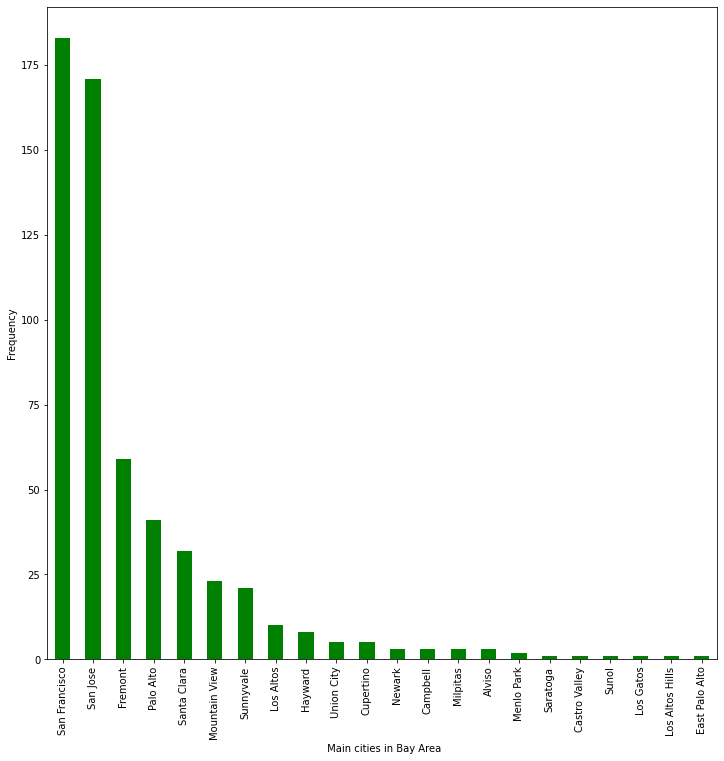

Number of cities in the data set= 22
               City  No_of_properties
0     San Francisco               183
1          San Jose               171
2           Fremont                59
3         Palo Alto                41
4       Santa Clara                32
5     Mountain View                23
6         Sunnyvale                21
7         Los Altos                10
8           Hayward                 8
9        Union City                 5
10        Cupertino                 5
11           Newark                 3
12         Campbell                 3
13         Milpitas                 3
14           Alviso                 3
15       Menlo Park                 2
16         Saratoga                 1
17    Castro Valley                 1
18            Sunol                 1
19        Los Gatos                 1
20  Los Altos Hills                 1
21   East Palo Alto                 1


578

In [6]:
places = df['City'].value_counts() 
plt.rcParams['figure.figsize'] = [12, 12]    #To adjust the figure size
places.plot(kind="bar",color='g')
plt.ylabel('Frequency')
plt.xlabel(' Main cities in Bay Area')
plt.show()
print("Number of cities in the data set=",len(df['City'].value_counts(normalize=False)))
k = df['City'].value_counts(normalize=False).to_frame().copy().reset_index().rename(columns = {'index': 'City', 'City': 'No_of_properties'}, inplace = False)
print(k)
k["No_of_properties"].sum()

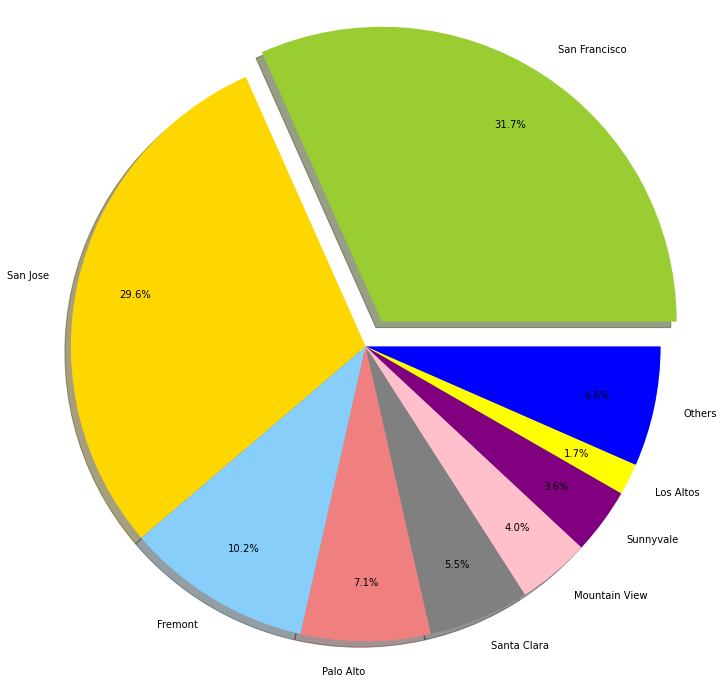

In [7]:
labellables = 'San Francisco', 'San Jose', 'Fremont', 'Palo Alto','Santa Clara','Mountain View','Sunnyvale','Los Altos','Others'
sizes = [183, 171, 59, 41,32,23,21,10, 38]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','grey','pink','purple','yellow','blue']
explode = (0.1, 0, 0, 0,0,0,0,0,0) # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots() #create a new figure object called fig1, and return a np array 
#containing the created subplot objects, where ax1 is the name. 
#You can also define the number of subplots by adjusting plt.subplots(), e.g., plt.subplots(2,2). 
ax1.pie(sizes, explode=explode, labels=labellables,colors=colors,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
san_francisco = df[df.City == 'San Francisco']
san_francisco

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
114,114,207 Ripley St,San Francisco,94110,3,2.0,2010.0,2200000.0,8488.0,1.0,...,NaN,Lowest,40.0,555.0,145.0,141.0,NaN,2495.0,NaN,NaN
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [9]:
san_francisco.reset_index(drop=True)

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
0,114,207 Ripley St,San Francisco,94110,3,2.0,2010.0,2200000.0,8488.0,1.0,...,NaN,Lowest,40.0,555.0,145.0,141.0,NaN,2495.0,NaN,NaN
1,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
2,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
3,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
4,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
179,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
180,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
181,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [10]:
#Is interested in finding the relationship between different parameters and price in San Francisco city

In [11]:
zipcode = san_francisco["Zipcode"].unique().tolist()
len(zipcode)

22

In [12]:
san_francisco["Bath"].isnull().sum()

1

In [13]:
san_francisco["Floor_Area(sq.ft)"].isnull().sum()

14

In [14]:
san_francisco["Price($)"].isnull().sum()

0

In [15]:
san_francisco["lot_Size(sq.ft)"].isnull().sum()

1

In [16]:
san_francisco["Year_Built"].isnull().sum()

10

In [24]:
san_francisco["Nightlife"].isnull().sum()

0

In [25]:
sfcity=san_francisco.dropna( how='all',
                    subset=['Bath'])
sfcity

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
114,114,207 Ripley St,San Francisco,94110,3,2.0,2010.0,2200000.0,8488.0,1.0,...,NaN,Lowest,40.0,555.0,145.0,141.0,NaN,2495.0,NaN,NaN
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [26]:
sfcity=sfcity.dropna( how='all',
                    subset=["Floor_Area(sq.ft)"])
sfcity

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
114,114,207 Ripley St,San Francisco,94110,3,2.0,2010.0,2200000.0,8488.0,1.0,...,NaN,Lowest,40.0,555.0,145.0,141.0,NaN,2495.0,NaN,NaN
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [27]:
sfcity=sfcity.dropna( how='all',
                    subset=['lot_Size(sq.ft)'])
sfcity

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
114,114,207 Ripley St,San Francisco,94110,3,2.0,2010.0,2200000.0,8488.0,1.0,...,NaN,Lowest,40.0,555.0,145.0,141.0,NaN,2495.0,NaN,NaN
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [28]:
sfcity=sfcity.dropna( how='all',
                    subset=['Year_Built'])
sfcity

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
119,119,529 Wildwood Way,San Francisco,94112,3,3.0,1642.0,1495000.0,5793.0,1.0,...,NaN,Lowest,62.0,155.0,35.0,20.0,1955.0,3036.0,14775.0,1166880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [29]:
sfcity=sfcity.dropna( how='all',
                    subset=['Estimated_mortgage/mo($)'])
sfcity

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,High_School,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($)
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,NaN,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,NaN,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,NaN,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,NaN,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0
119,119,529 Wildwood Way,San Francisco,94112,3,3.0,1642.0,1495000.0,5793.0,1.0,...,NaN,Lowest,62.0,155.0,35.0,20.0,1955.0,3036.0,14775.0,1166880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,NaN,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,NaN,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,NaN,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,NaN,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0


In [76]:
years = sfcity["Year_Built"].tolist()
years
print(type(years))
print(len(years))
houseAge =[]
for i in range(0,len(years)):
    houseAge.append(2021-int(years[i]))
    


<class 'list'>
160


In [35]:
sfcity2 = sfcity.copy()

sfcity2["houseAge"] = houseAge
sfcity2

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,Crime,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($),houseAge
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,Lowest,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0,65
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,Lowest,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0,113
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,Low,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0,112
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,Lowest,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0,40
119,119,529 Wildwood Way,San Francisco,94112,3,3.0,1642.0,1495000.0,5793.0,1.0,...,Lowest,62.0,155.0,35.0,20.0,1955.0,3036.0,14775.0,1166880.0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,Lowest,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0,98
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,Highest,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0,114
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,Lowest,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0,116
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,Lowest,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0,19


In [36]:
#counted lowest and low as 0 whereas high, highest and moderate as 1 for the sake of doing linear regression later
crime =sfcity2["Crime"].tolist()

CrimeIndicator =[]
for i in range(0,len(crime)):
    if crime[i]=="Low" or crime[i]=="Lowest":
        CrimeIndicator.append(0)
    else:
        CrimeIndicator.append(1) 


In [41]:
sfcitynew = sfcity2.copy()
sfcitynew["CrimeIndicator"] = CrimeIndicator
sfcitynew

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($),houseAge,CrimeIndicator
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0,65,0
116,116,2660 Scott St,San Francisco,94123,7,6.0,9190.0,19200000.0,73501.0,1.0,...,59.0,538.0,92.0,175.0,1908.0,5623.0,171806.0,14269573.0,113,0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0,112,0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0,40,0
119,119,529 Wildwood Way,San Francisco,94112,3,3.0,1642.0,1495000.0,5793.0,1.0,...,62.0,155.0,35.0,20.0,1955.0,3036.0,14775.0,1166880.0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0,98,0
293,293,606 Ellis St,San Francisco,94109,3,2.0,1635.0,1449888.0,5614.0,1.0,...,34.0,1969.0,343.0,720.0,1907.0,2186.0,12789.0,912041.0,114,1
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0,116,0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0,19,0


In [42]:
zipcode = sfcitynew["Zipcode"].unique().tolist()
len(zipcode)

22

In [43]:
priceMoreThanPropertyAssessment=sfcitynew[sfcitynew["Price($)"]>=sfcitynew["Property_Assessment($)"]]
len(priceMoreThanPropertyAssessment)

130

In [44]:
housesOlderthan50years=sfcitynew[sfcitynew.houseAge>=50]
print("Number of Houses in San Francisco city which are older than 50 years= ",len(housesOlderthan50years))

Number of Houses in San Francisco city which are older than 50 years=  142


In [45]:
housesOlderthan100years=sfcitynew[sfcitynew.houseAge>=100]
print("Number of Houses in San Francisco city which are older than 100 years= ",len(housesOlderthan100years))

Number of Houses in San Francisco city which are older than 100 years=  72


In [46]:
sfcitynew.groupby(['Zipcode',"Crime"]).sum()
zipCrime = sfcitynew.pivot_table('Price($)', index='Zipcode', columns='Crime', aggfunc='count')
zipCrime

Crime,High,Highest,Low,Lowest,Moderate
Zipcode,,,,,
94102,NaN,NaN,NaN,NaN,1.0
94103,NaN,1.0,NaN,NaN,NaN
94105,NaN,NaN,NaN,NaN,1.0
94107,1.0,NaN,NaN,4.0,NaN
94108,NaN,NaN,NaN,1.0,NaN
94109,NaN,1.0,1.0,3.0,NaN
94110,NaN,NaN,5.0,11.0,8.0
94112,1.0,NaN,1.0,17.0,NaN
94114,NaN,NaN,NaN,9.0,NaN


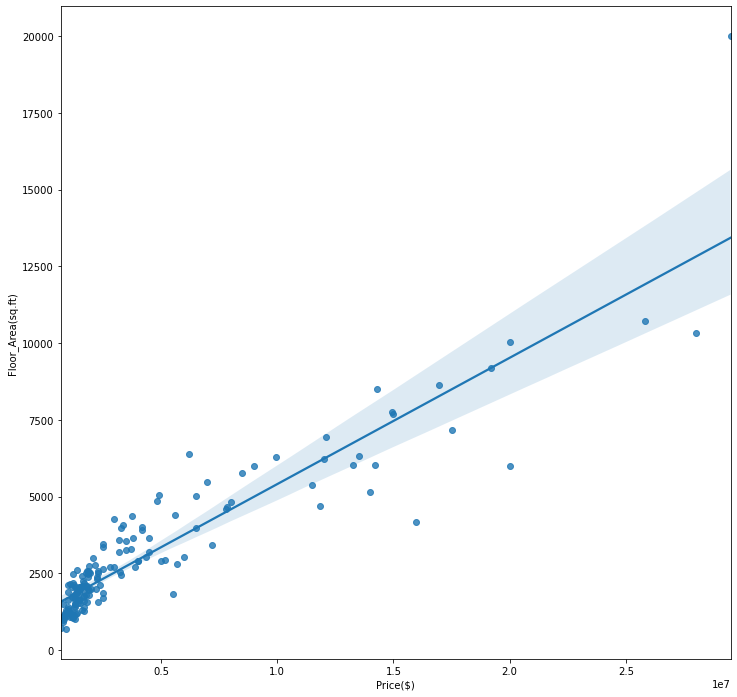

In [47]:
sns.regplot("Price($)", "Floor_Area(sq.ft)", sfcitynew) # affect of floor area on the price

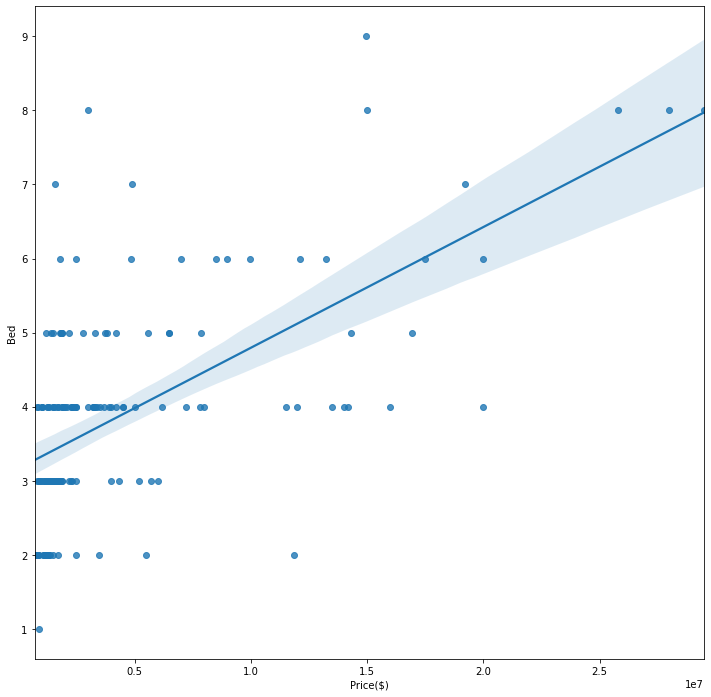

In [48]:
sns.regplot("Price($)", "Bed", sfcitynew)# affect of number of bedrooms on the price

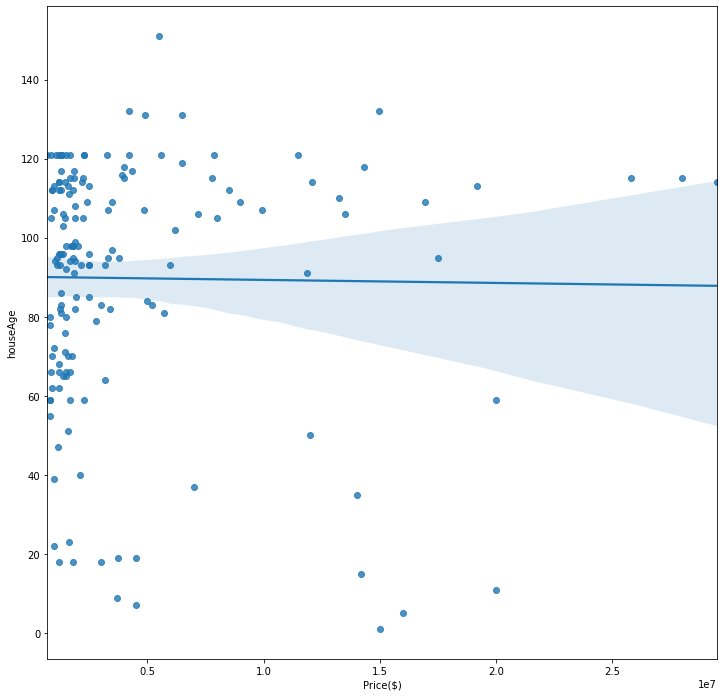

In [49]:
sns.regplot("Price($)", "houseAge", sfcitynew) # affect of house age on the price

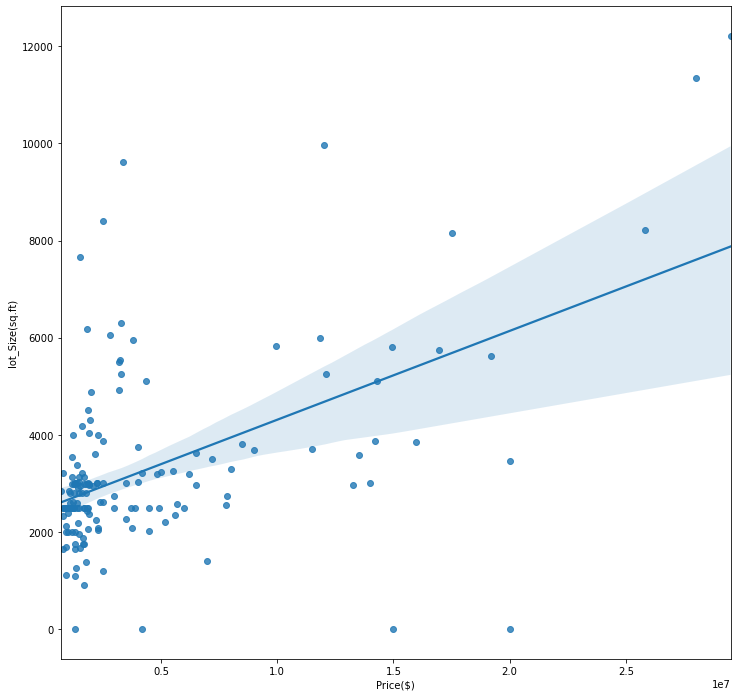

In [50]:
sns.regplot("Price($)", "lot_Size(sq.ft)", sfcitynew)# affect of lot size on the price


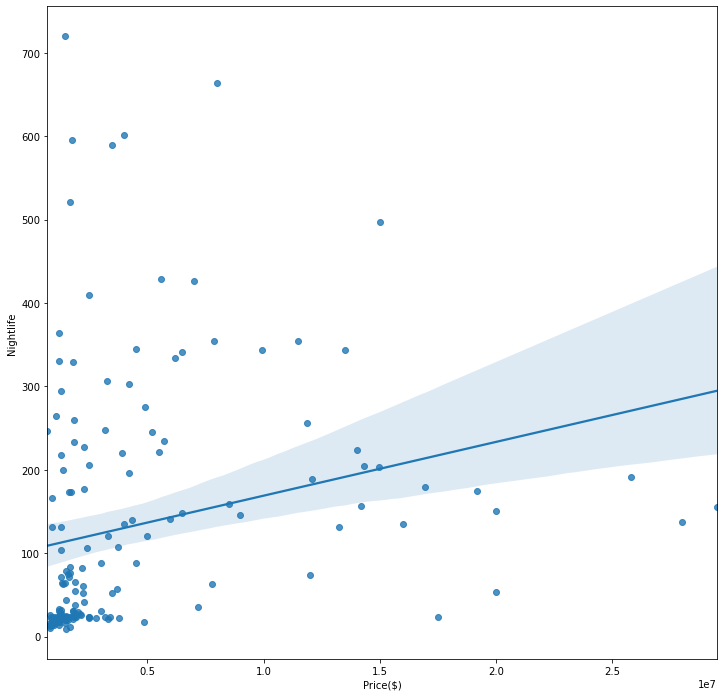

In [51]:
sns.regplot("Price($)", "Nightlife", sfcitynew)# affect of nightlife on the price

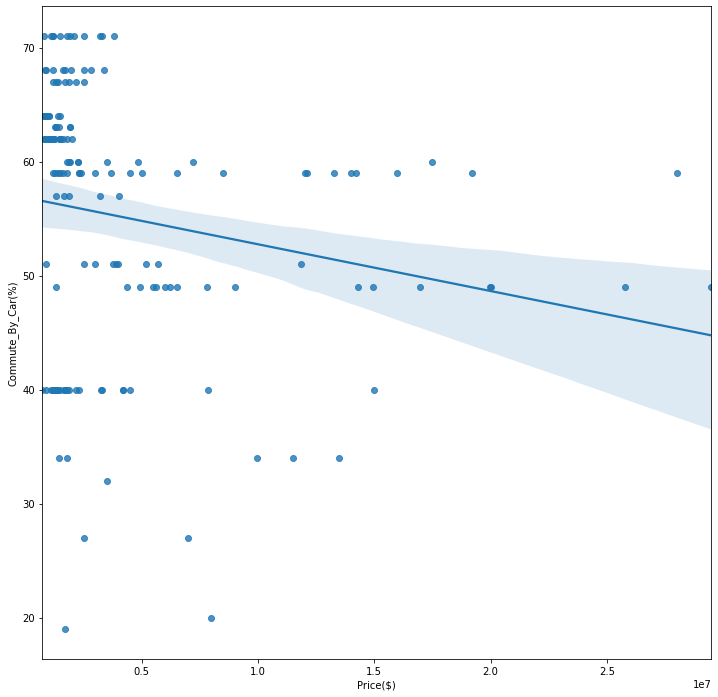

In [52]:
sns.regplot("Price($)", "Commute_By_Car(%)", sfcitynew)# affect of car dependency on the price

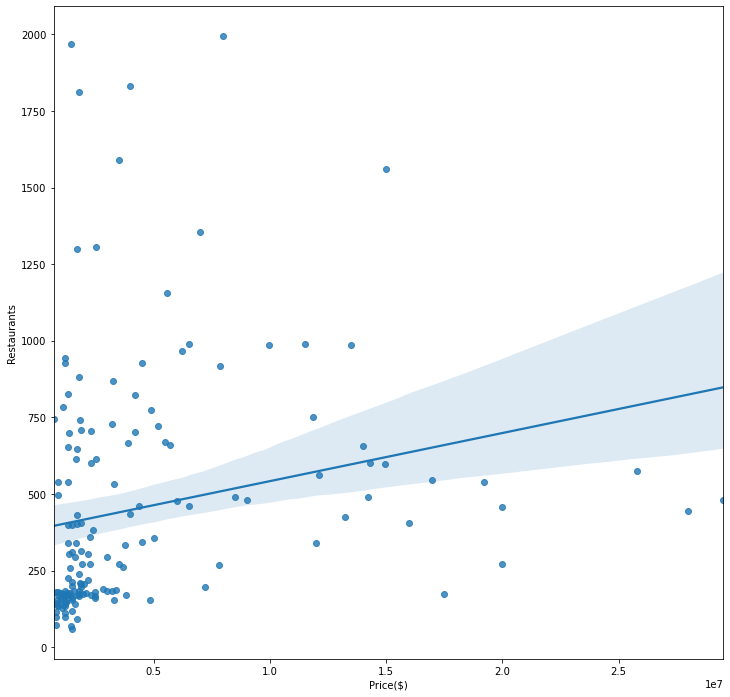

In [53]:
sns.regplot("Price($)", "Restaurants", sfcitynew)# affect of near by eating joints on the price

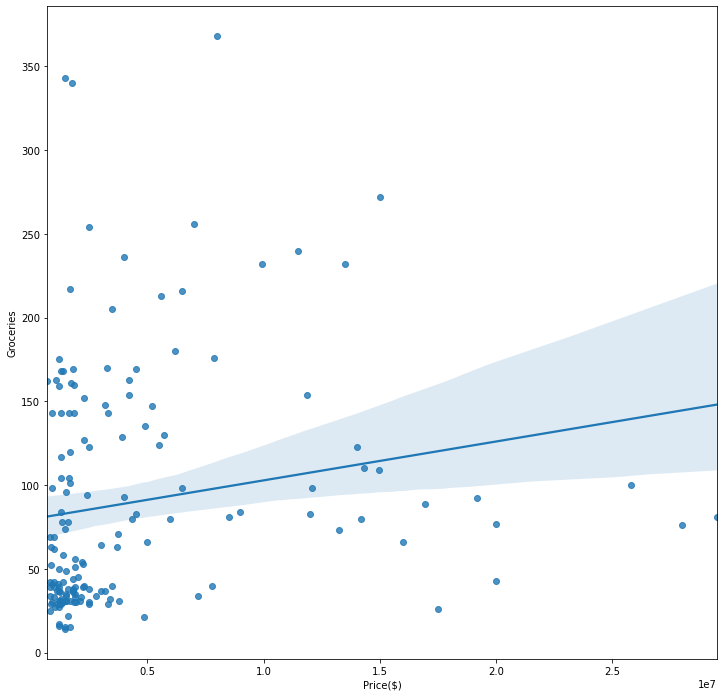

In [54]:
sns.regplot("Price($)", "Groceries", sfcitynew)# affect of grocery stores on the price

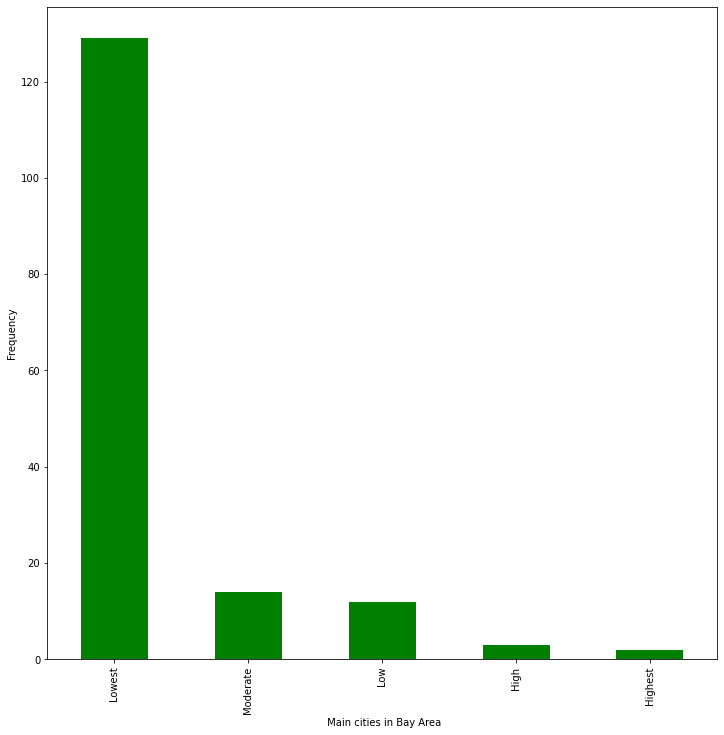

Houses for sale oin different crime ratings:


Lowest      129
Moderate     14
Low          12
High          3
Highest       2
Name: Crime, dtype: int64

In [55]:
city3 = sfcitynew['Crime'].value_counts() 
plt.rcParams['figure.figsize'] = [12, 12]    #To adjust the figure size
city3.plot(kind="bar",color='g')
plt.ylabel('Frequency')
plt.xlabel(' Main cities in Bay Area')
plt.show()
print("Houses for sale oin different crime ratings:")
sfcitynew['Crime'].value_counts(normalize=False)

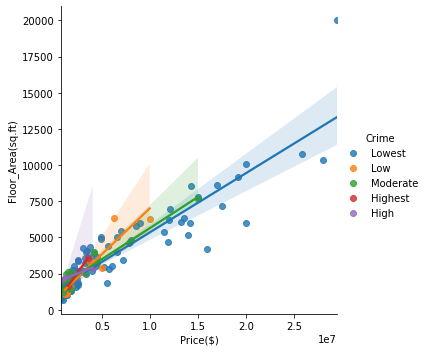

In [56]:
sns.lmplot("Price($)", "Floor_Area(sq.ft)", hue = 'Crime', data = sfcitynew);# affect of crime on the price along with floor area

In [57]:
# From the above analysis we get to know that the dataset contain total of 578 records, the highest number of records
#belongs to San Francisco city(183).

# After deciding to study the Property Market of San Francisco City, a subset of original dataset is extracted with
#all the records of the property in the city for sale.

#As the data was becoming very short if the outliers are removed therefore first did the analysis with clean data
#with outliers and then did it without outliers which helped in comparision with a real life proper and let know 
#that which model will provide best fit

# As the city is further on divided into several zipcodes, we get to know that there are 22 zipcodes data
#From the pivot table, and bar plot got to know that currently max properties are in the region where there is lowest crime rate

#Also got to know that 142 house are older than 50 year and out of them 72 are more than 100 years old. Moreover,
#there area 130 properties whose prices are more than the property assessment prices

#As next step is to find a linear relationship between different parameter and price of the property, 
#several analysis are again done

#Linear regression was done to explain how the selected parameters(Bed,Bath,Floor area,Lot area,
#age of the house, Crime rate, nightlife near by, Restaurants near by, Grocery stores near by and 
#estimated mortgage) affect the price of the property

# The relationship between the price and different parameters are learnt through different plots and the insights are:
# Bed, Bath, Floor area, Lot size, Estimated mortage, Groceries, Restaurants,Nightlife all have positive linear 
#relationship with the price of the property which mean with the increment in these parameters, the prices will go up
#or vice-versa
#House age however seems to be neutral with the price of the property in the city
#And for the crime rate,most of the houses with larger floor area and huge prices are availble in the lowest crime rate
#area of the city


###Note: The new columns for house age and crime indicator(where 0 is for lowest and low region; and 1 is for high,
#highest and moderate regions) is added for the purpose of calculation 


#The relationship developed by running the linear regression (For clean data)is:
# -31885.21 + 1841.22Bed - 698.74Bath - 2.47Floor + 2.91Lot + 261.41Mortgage + 11.91Grocery 
# - 14.77Restaurants + 55.41Nightlife + 32.30HoseAge - 6.81CrimeIndicator


#The relationship developed by running the linear regression (For clean data and without outliers)is:
# -14892.41 + 247.26Bed -127.95Bath + 0.84Floor - 1.96Lot +  261.68Mortgage - 71.15Grocery 
# + 14.71Restaurants - 23.50Nightlife -23.19HouseAge - 0CrimeIndicator


#Although Some parameters are confusing like how the bath,floor area and restaurants near by are having negative affect and  house age is
#having positive affect on the price in clean data file, may be because some of the large house are sold way below their worth or old house are 
#sold way above the worth prices or may be the current scenario of the time that people are moving away from the population .

# Confusing parameter output in the clean without outlier files are the Bath, lot size, Grocery, nightlife and there is no role of crime, and they might
#be affect to due the current pandemic scenario when people can work from home thus moving to far way places to save more
#, which clearly justifying.

In [58]:
##To explore the real state properties in San Francisco city clean data

In [80]:

from sklearn import linear_model
import statsmodels.api as sm
X = sfcitynew[['Bed','Bath','Floor_Area(sq.ft)','lot_Size(sq.ft)','Estimated_mortgage/mo($)','Groceries','Restaurants','Nightlife','houseAge','CrimeIndicator']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = sfcitynew['Price($)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#prediction with sklearn
#https://www.trulia.com/p/ca/san-francisco/1317-bosworth-st-san-francisco-ca-94131--2083069387
Bedroom=3
Bathroom=2
FloorArea=1625
Lotsize=6075
estmort=6600
groc=39
restaurant=201
nightlife=34
house_age=100
crime_indicator=0
print("Price on Website = $1,695,000")
print ('Predicted Property Price: \n', regr.predict([[Bedroom,Bathroom,FloorArea, Lotsize, estmort, groc, restaurant,nightlife,house_age, crime_indicator]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -31885.213987631723
Coefficients: 
 [1841.21579244 -698.73501259   -2.466603      2.90684858  261.407448
   11.90994357  -14.77161406   55.41063726   32.3019812    -6.81212953]
Predicted Property Price: 
 [1713790.54855995]
                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.613e+06
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        22:17:50   Log-Likelihood:                -1780.9
No. Observations:                 160   AIC:                             3584.
Df Residuals:                     149   BIC:                             3618.
Df Model:                          10                                         
Covariance Type:            nonrobust               

In [60]:
#To explore the real state properties in San Francisco city after removing outliers

In [61]:
Q1 = sfcitynew.quantile(0.25)
Q3 = sfcitynew.quantile(0.75)
IQR = Q3 - Q1
dfWithoutOutliers = sfcitynew[~((sfcitynew < (Q1 - 1.5*IQR))| (sfcitynew > (Q3 + 1.5*IQR))).any(axis = 1)]
dfWithoutOutliers

,Unnamed: 0,Street_Address,City,Zipcode,Bed,Bath,Floor_Area(sq.ft),Price($),Estimated_mortgage/mo($),Elementary_School,...,Commute_By_Car(%),Restaurants,Groceries,Nightlife,Year_Built,lot_Size(sq.ft),Property_Tax_2020,Property_Assessment($),houseAge,CrimeIndicator
115,115,187 Skyview Way,San Francisco,94131,3,2.0,1868.0,1395000.0,5410.0,1.0,...,59.0,259.0,42.0,63.0,1956.0,3371.0,18163.0,1456560.0,65,0
117,117,18 Lapidge St,San Francisco,94110,2,1.0,1083.0,1195000.0,4645.0,1.0,...,40.0,944.0,175.0,364.0,1909.0,2000.0,3024.0,182057.0,112,0
118,118,871 Foerster St,San Francisco,94127,4,4.0,2996.0,2097000.0,8095.0,1.0,...,71.0,177.0,31.0,27.0,1981.0,2957.0,18007.0,1373695.0,40,0
119,119,529 Wildwood Way,San Francisco,94112,3,3.0,1642.0,1495000.0,5793.0,1.0,...,62.0,155.0,35.0,20.0,1955.0,3036.0,14775.0,1166880.0,66,0
122,122,762 29th Ave,San Francisco,94121,3,3.0,1804.0,1795000.0,6939.0,1.0,...,60.0,238.0,44.0,31.0,1923.0,2996.0,11288.0,878599.0,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,1328 York St,San Francisco,94110,3,1.0,1200.0,1375000.0,5328.0,1.0,...,40.0,700.0,168.0,200.0,1918.0,2596.0,19132.0,1534590.0,103,0
292,292,1330 Plymouth Ave,San Francisco,94112,4,3.0,1985.0,1999000.0,7723.0,1.0,...,62.0,207.0,45.0,30.0,1923.0,4874.0,6526.0,489740.0,98,0
294,294,918 Noe St,San Francisco,94114,4,4.0,2705.0,3899000.0,14969.0,1.0,...,51.0,666.0,129.0,220.0,1905.0,2500.0,28954.0,2350000.0,116,0
295,295,583 Corbett Ave,San Francisco,94114,5,6.0,4370.0,3750000.0,14400.0,1.0,...,51.0,335.0,71.0,108.0,2002.0,2078.0,28448.0,2307768.0,19,0


In [62]:
zipcode1 = dfWithoutOutliers["Zipcode"].unique().tolist()
len(zipcode1)

14

In [63]:
data = {"Price($)":sfcitynew["Price($)"].tolist(),"Floor Area(sq.ft)":sfcitynew["Floor_Area(sq.ft)"].tolist(),"Lot Area":sfcitynew["lot_Size(sq.ft)"].tolist()}
data_new = {"Price($)":dfWithoutOutliers["Price($)"].tolist(),"Floor Area(sq.ft)":dfWithoutOutliers["Floor_Area(sq.ft)"].tolist(),"Lot Area":dfWithoutOutliers["lot_Size(sq.ft)"].tolist()}



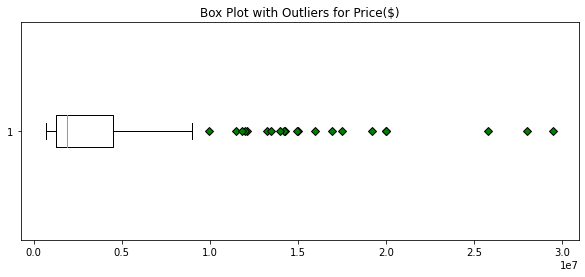

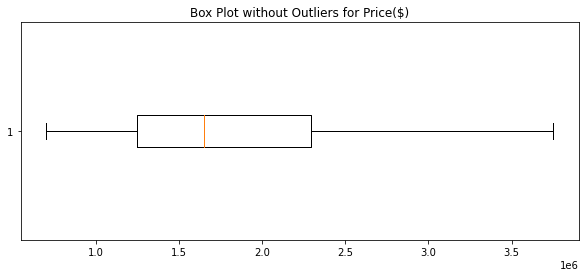

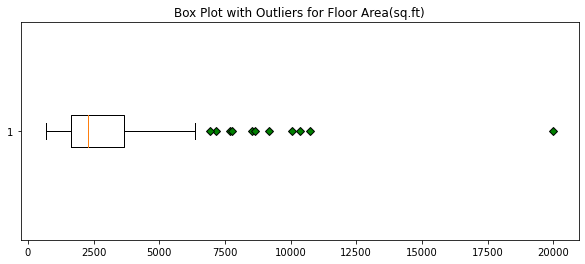

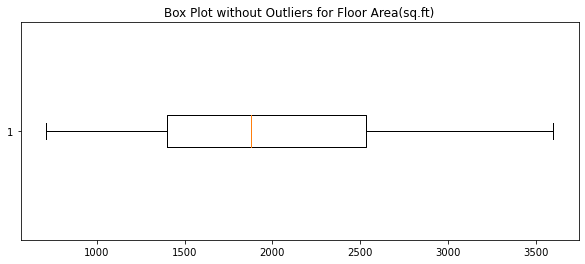

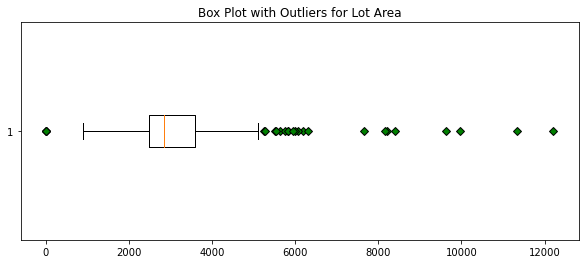

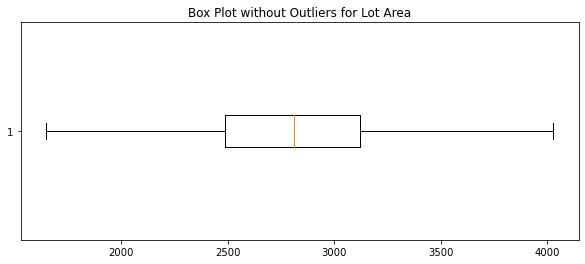

In [64]:
for i,j in data.items():

    plt.rcParams['figure.figsize'] = [10, 4]
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig1, ax1 = plt.subplots()
    ax1.set_title('Box Plot with Outliers for '+ i)
    ax1.boxplot(j,flierprops=green_diamond, vert=False)


    fig2, ax2 = plt.subplots()
    ax2.set_title('Box Plot without Outliers for '+ i)
    ax2.boxplot(data_new[i],vert=False,showfliers=False)

    plt.show()

In [81]:
from sklearn import linear_model
import statsmodels.api as sm
X = dfWithoutOutliers[['Bed','Bath','Floor_Area(sq.ft)','lot_Size(sq.ft)','Estimated_mortgage/mo($)','Groceries','Restaurants','Nightlife','houseAge','CrimeIndicator']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = dfWithoutOutliers['Price($)']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#prediction with sklearn
Bedroom=3
Bathroom=2
FloorArea=1625
Lotsize=6075
estmort=6600
groc=39
restaurant=201
nightlife=34
house_age=100
crime_indicator=0
print("Price on Website = $1,695,000")
print ('Predicted Property Price: \n', regr.predict([[Bedroom,Bathroom,FloorArea, Lotsize, estmort, groc, restaurant,nightlife,house_age, crime_indicator]]))



# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -14892.414278339129
Coefficients: 
 [ 247.25516978 -127.95006818    0.84062508   -1.9611633   261.68203692
  -71.15274983   14.7135758   -23.50390951  -23.1900126     0.        ]
Price on Website = $1,695,000
Predicted Property Price: 
 [1699211.18076842]
                            OLS Regression Results                            
Dep. Variable:               Price($)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.966e+05
Date:                Wed, 12 May 2021   Prob (F-statistic):          4.22e-183
Time:                        22:22:21   Log-Likelihood:                -979.35
No. Observations:                  93   AIC:                             1979.
Df Residuals:                      83   BIC:                             2004.
Df Model:                           9                                         
Covariance Type:    

/Users/ab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/ab/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/ab/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [70]:
dfWithoutOutliers.groupby(['Zipcode',"Crime"]).sum()
zipcrime2 = dfWithoutOutliers.pivot_table('Price($)', index='Zipcode', columns='Crime', aggfunc='count')
zipcrime2

Crime,Low,Lowest
Zipcode,,
94107,NaN,3.0
94110,5.0,9.0
94112,1.0,16.0
94114,NaN,6.0
94115,1.0,4.0
94116,NaN,7.0
94117,NaN,1.0
94121,1.0,7.0
94122,NaN,6.0
